In [ ]:
# Installing packages
!pip install pandas-profiling 

In [85]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [86]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Global variables
LABEL_NAME = 'diagnosis'
DATA_PATH = '/content/drive/My Drive/Data Science/Breast Cancer/data.csv'
TRAIN_PATH = r'/content/drive/My Drive/Data Science/Breast Cancer/training_data'
TEST_PATH = r'/content/drive/My Drive/Data Science/Breast Cancer/testing_data'

## **Reading and Splitting the dataset:**
Reading and splitting the dataset into train and test set using a 80-20 split. All the analysis will be performed on the training set only. This is because of the following assumptions.
- Test data, like in any ML problem, is data that we have 0 access to. This is to ensure minimum bias.
- Test data follows a similar distribution as the training set

### **Output:**
After splitting, there are **455 training data points** and **114 testing data points**.

In [88]:
# Reading the dataset 
data = pd.read_csv(DATA_PATH)

# Splitting the dataset
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)

# Saving them to .csv
testing_data.to_csv(TEST_PATH, index=False, header=True)
training_data.to_csv(TRAIN_PATH, index=False, header=True)

print(training_data.shape, testing_data.shape)

(455, 33) (114, 33)


## **Attributes:**

- There are 33 columns in the dataset. 
- These comprise of the **ID, Diagnosis (M = malignant, B = benign) and Nuclear features**.
- Mean, standard error (se) and worst (mean of the three
largest values) of each features were calculated for every image,
resulting in 3 x 10 = 30 features. 
- The 33rd column is an Unnamed column.

### **Nuclear features of each cell:**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1.   radius (mean of distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

### **Output:**

All values contained in the 33rd column 'Unnamed: 32' are **NaN**s. Also, the column 'id' is unnecessary as it's not a feature that can be used.

### **Actions:**

1. Remove column 'Unnamed: 32'
2. Remove column 'id'

In [89]:
print("1. List of all columns before removal:")
print(training_data.columns)

print("\n 2. Unnamed: 32 - details")
print(training_data['Unnamed: 32'].info())

columns_to_remove = ['Unnamed: 32', 'id']

training_data = training_data.drop(columns_to_remove, axis=1)

print("\n3. List of all columns after removal:")
print(training_data.columns)

1. List of all columns before removal:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

 2. Unnamed: 32 - details
<class 'pandas.core.series.Series'>
Int64Index: 455 entries, 180 to 132
Series name: Unnamed: 32
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 7.1 KB
None

3. List of all columns after removal:
Index(['diagnosi

### **Descriptive and Quantile statistics:**

Peforming Exploratory Data Analysis on the training dataset.

### **Output:**
With profiling, we could determine the number of missing values, the minimum, mean, maximum, standard deviation, and skewness values for each attribute.

In [90]:
profile = ProfileReport(training_data, minimal=True)
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Data clean up and normalization:**
- We didn't find any null/missing values
- Now we will have to convert categorical values to numeric values
- Only the target variable (diagnosis) has categorical values
- We will convert B = 0 and M = 1
- Then we will normalize the data

### **Output:**

The output below shows the min and max before and after normalization. This just shows that the features have truly been normalized to (0, 1) range. 

Besides this, the number of unique rows (including label) matches the total count. Thus, there are no duplicate datapoints. However, error in dataset could lead to same feature combination having different labels. But the number of unique feature combinations too matches the total count.

Thus, there are no duplications in the dataset.


### **Actions:**
1. Normalized features using MinMax normalization
2. Converted categorical values (B, M) in diagnosis to numeric values (0, 1)

In [91]:
training_data[LABEL_NAME].replace(['B', 'M'], [0, 1], inplace=True)

label = training_data[LABEL_NAME]

In [92]:
features = training_data.drop(LABEL_NAME, axis=1)

scaler = preprocessing.MinMaxScaler().fit(features)
norm_features = scaler.transform(features)

training_data.loc[:, training_data.columns != LABEL_NAME] = norm_features

print('Mins before normalization:', features.min(axis=0))
print('\nMins after normalization:', norm_features.min(axis=0))

print('\nMaxs before normalization:', features.max(axis=0))
print('\nMaxs after normalization:', norm_features.max(axis=0))

Mins before normalization: radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.116700
fractal_dimension_mean       0.049960
radius_se                    0.114400
texture_se                   0.360200
perimeter_se                 0.771400
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.009539
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst      

In [93]:
unique_data = training_data.value_counts()
unique_features = features.value_counts()

print('Number of unique data rows', len(unique_data))
print('Number of unique feature combintations', len(unique_features))

Number of unique data rows 455
Number of unique feature combintations 455


###**Correlation Matrix:**
- Plotted a heatmap for normalized values of training data

###**Output:**
- **Diagnosis** has strong correlation with **concave_points_worst, perimeter_worst, radius_worst**
- Other features highly correlated to each other are:

1.   radius_mean to perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst
2. perimeter_mean and area_mean to radius_worst,perimeter_worst, area_worst
3. radius_worst to perimeter_worst, area_worst

Overall, features related to **radius, perimeter and area** are highly correlated amongst each other. Seems like a logical conclusion to draw since larger the radius, larger the perimeter, and larger the radius!


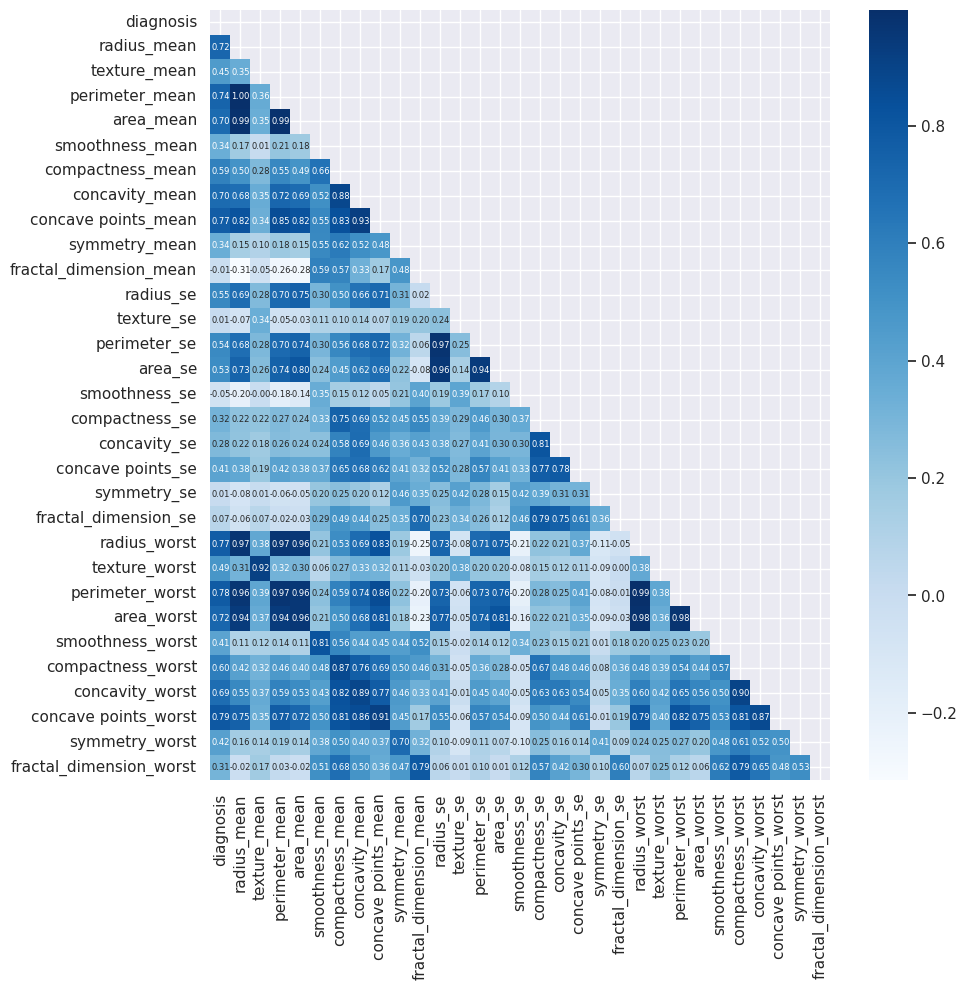

In [94]:
sn.set(rc = {'figure.figsize':(10, 10)})
sn.heatmap(training_data.corr(), 
           mask=np.triu(np.ones_like(training_data.corr(), dtype=bool)), 
           cmap="Blues", 
           annot=True, 
           annot_kws={"fontsize":6}, 
           fmt='.2f')
plt.show()

### **Visualizing prevalent features:**
The features identified as prevalent in the heatmap are plotted against each other. 

The green dots indicate label=0 (Benign), where as red dots indicate label=1 (Malignant)

### **Output:**
Though the plots seem to be able to distinguish between the two labels, there isn't a clear line of distinction between them.

There still exists a significant overlap between the green and red dots, thus won't be able to give a good accuracy.

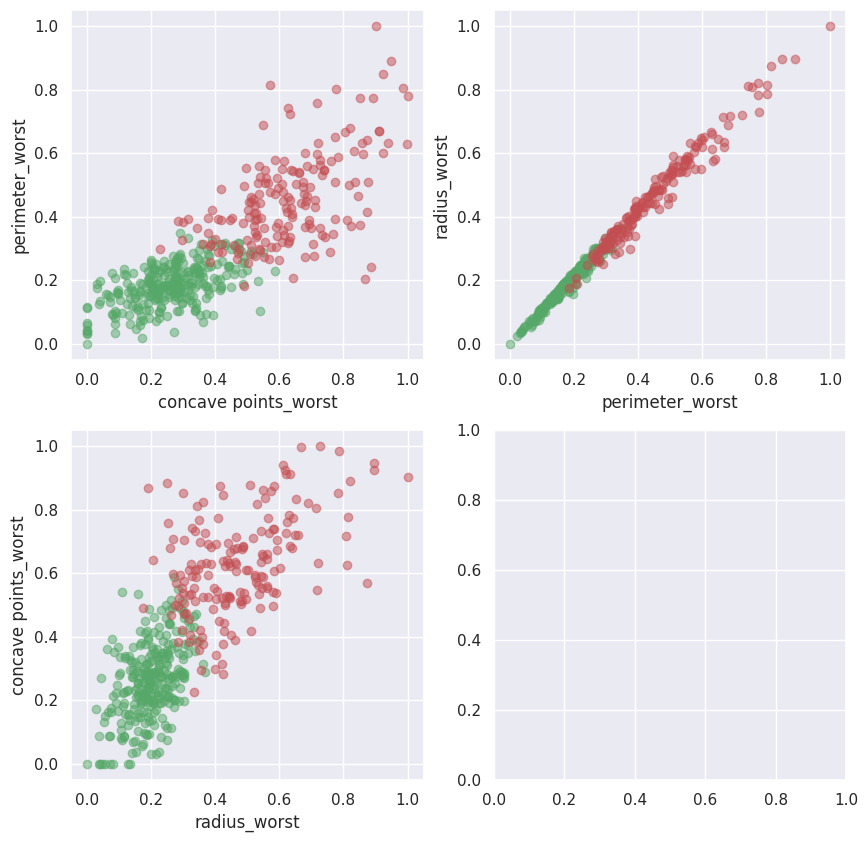

In [95]:
feature1 = 'concave points_worst'
feature2 = 'perimeter_worst'
feature3 = 'radius_worst'

fig, ax = plt.subplots(nrows=2, ncols=2)

# Feature1 v Feature2
ax[0][0].scatter(training_data[feature1][label == 0], training_data[feature2][label == 0], alpha=0.5, c='g')
ax[0][0].scatter(training_data[feature1][label == 1], training_data[feature2][label == 1], alpha=0.5, c='r')
ax[0][0].set_xlabel(feature1)
ax[0][0].set_ylabel(feature2)
# Feature2 v Feature3
ax[0][1].scatter(training_data[feature2][label == 0], training_data[feature3][label == 0], alpha=0.5, c='g')
ax[0][1].scatter(training_data[feature2][label == 1], training_data[feature3][label == 1], alpha=0.5, c='r')
ax[0][1].set_xlabel(feature2)
ax[0][1].set_ylabel(feature3)
# Feature3 v Feature1
ax[1][0].scatter(training_data[feature3][label == 0], training_data[feature1][label == 0], alpha=0.5, c='g')
ax[1][0].scatter(training_data[feature3][label == 1], training_data[feature1][label == 1], alpha=0.5, c='r')
ax[1][0].set_xlabel(feature3)
ax[1][0].set_ylabel(feature1)

plt.show()

### **Dimensionality Reduction:** 
We performed PCA on all 30 features to obtain 30 new features with the variance of distribution of data in decresing order listed in the output.

The new features are in decresing order of how well they distribute and spread the data (high variance). The reason why these new features are better is because the more the data is spread, the easier it is to categorize them (such as B and M, in this case). 

### **Output:**
1. Variance values for new 30 features in decresing order
2. The first feature itself has a variance value of approx. 53%
3. The first 2 features combined have a variance value of approx. 71%
4. The first 5 features combined have a variance value of approx. 88%
5. The first 10 features combined have a variance value of approx. 96%
6. The first 15 features combined have a variance value of approx. 99%
7. The first 20 features combined have a variance value of approx. 99.6%

In [96]:
features = training_data.drop(['diagnosis'], axis=1)

pca_30 = PCA(n_components=30)
 
pca_features = pca_30.fit_transform(features)

print("1. ", pca_30.explained_variance_ratio_, pca_30.components_.shape)
print("2. ", pca_30.explained_variance_ratio_[0])
print("3. ", sum(pca_30.explained_variance_ratio_[0:2]))
print("4. ", sum(pca_30.explained_variance_ratio_[0:5]))
print("5. ", sum(pca_30.explained_variance_ratio_[0:10]))
print("6. ", sum(pca_30.explained_variance_ratio_[0:15]))
print("7. ", sum(pca_30.explained_variance_ratio_[0:20]))

1.  [5.29811904e-01 1.80123334e-01 6.77706796e-02 6.04316206e-02
 4.14557195e-02 3.15063507e-02 1.66875828e-02 1.15320547e-02
 9.74105725e-03 9.39260374e-03 8.41164327e-03 7.52752114e-03
 6.94389475e-03 4.25341050e-03 2.68956872e-03 2.37795991e-03
 1.79897437e-03 1.46203782e-03 1.32307858e-03 1.02510590e-03
 8.64918511e-04 8.16264114e-04 6.18232680e-04 4.87348986e-04
 3.97023558e-04 2.86884561e-04 1.80291509e-04 5.18363081e-05
 2.54841330e-05 5.61352603e-06] (30, 30)
2.  0.5298119044075587
3.  0.7099352381679556
4.  0.8795932578299331
5.  0.9584529071456274
6.  0.9882789455295772
7.  0.9962661021135605


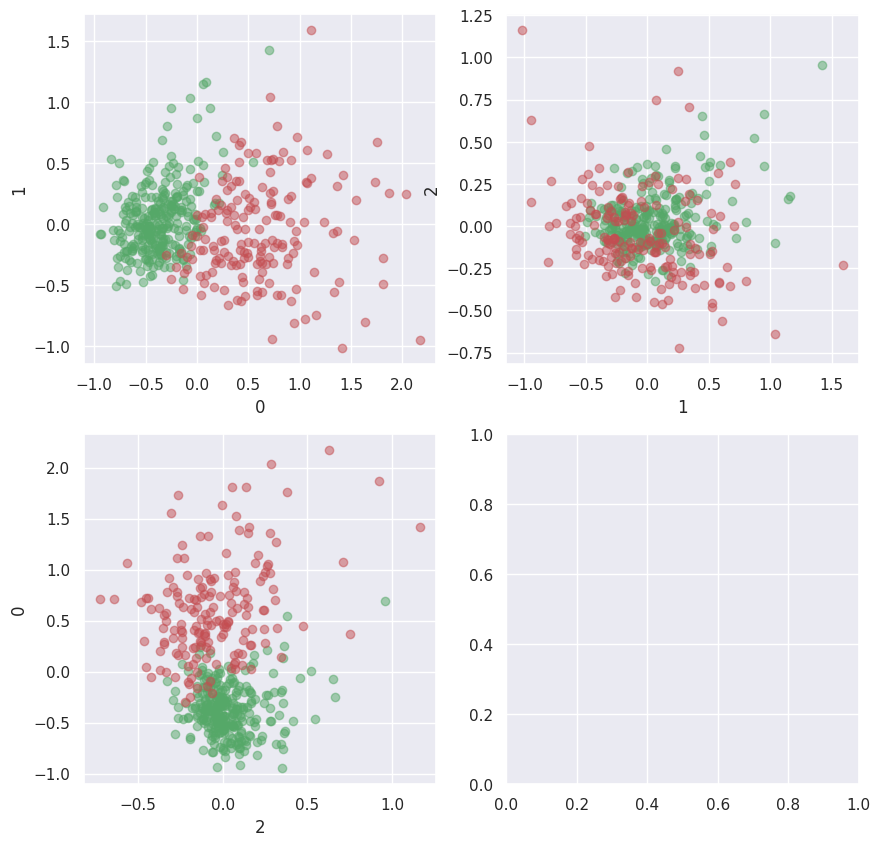

In [97]:
feature1 = 0
feature2 = 1
feature3 = 2

fig, ax = plt.subplots(nrows=2, ncols=2)

# Feature1 v Feature2
ax[0][0].scatter(pca_features[:, feature1][label == 0], pca_features[:, feature2][label == 0], alpha=0.5, c='g')
ax[0][0].scatter(pca_features[:, feature1][label == 1], pca_features[:, feature2][label == 1], alpha=0.5, c='r')
ax[0][0].set_xlabel(feature1)
ax[0][0].set_ylabel(feature2)
ax[0][1].scatter(pca_features[:, feature2][label == 0], pca_features[:, feature3][label == 0], alpha=0.5, c='g')
ax[0][1].scatter(pca_features[:, feature2][label == 1], pca_features[:, feature3][label == 1], alpha=0.5, c='r')
ax[0][1].set_xlabel(feature2)
ax[0][1].set_ylabel(feature3)
ax[1][0].scatter(pca_features[:, feature3][label == 0], pca_features[:, feature1][label == 0], alpha=0.5, c='g')
ax[1][0].scatter(pca_features[:, feature3][label == 1], pca_features[:, feature1][label == 1], alpha=0.5, c='r')
ax[1][0].set_xlabel(feature3)
ax[1][0].set_ylabel(feature1)
plt.show()